<a href="https://colab.research.google.com/github/jnramirezg/mecanica_de_solidos/blob/main/codigo/10-(2_9_4)-ejemplo_circulo_mohr_2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10. Ejemplo Círculo de mohr (sección 2.9.4)

|Quién | Fecha | Qué hizo |
| ---  | ---   | ---      |
|Michael Heredia Pérez, <mherediap@unal.edu.co> | 2022-07-15 | Conversión de código de MAXIMA a Python|
|Michael Heredia Pérez, <mherediap@unal.edu.co> | 2022-09-15 | Mejor presentación de resultados y otros cálculos|
|Michael Heredia Pérez, <mherediap@unal.edu.co> | 2022-09-19 | Cambiando comando ```.eig``` por ```.eigh``` |
|Juan Nicolás Ramírez, <jnramirezg@unal.edu.co> | 2022-09-19 | Simplificando y adecuando |



Importamos algunas funciones necesarias de ```numpy```, importamos el submódulo ```linalg``` de ```numpy``` (álgebra lineal) y el módulo ```matplotlib.pyplot``` para hacer gráficas:

In [1]:
from numpy import array, arctan2, rad2deg, linspace, sin, cos, pi
import numpy.linalg as LA
import matplotlib.pyplot as plt

## Matriz de tensiones
Definimos las componentes de esfuerzos dadas como variables numéricas:

In [2]:
sx  = -1  # [Pa]
sy  =  2  # [Pa]
txy = -3  # [Pa]

Definimos la matriz de tensiones $\underline{\underline{\boldsymbol{\sigma}}}$ en tres dimensiones:

In [3]:
sigma = array([[ sx, txy], 
               [txy,  sy]])
sigma  # Imprimir.

array([[-1, -3],
       [-3,  2]])

## Esfuerzos y direcciones principales

Los valores propios (esfuerzos principales) y los vectores propios (direcciones principales) de la matriz de esfuerzos $\underline{\underline{\sigma}}$ los calculamos en ```numpy.linalg```, que llamamos ```LA```, específicamente con la función ```LA.eigh()``` que calcula tanto los valores ```valp``` como los vectores propios ```vecp```. Esta función retorna una lista de dos entradas, la primera contiene los valores propios y la segunda contiene los vectores porpios.

In [4]:
valp, vecp = LA.eigh(sigma)

**Nota:** refiérase a la documentación para entender porqué se usa el comando [numpy.linalg.eigh](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html) en lugar del [numpy.linalg.eig](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html). La función ```LA.eigh()``` se usa en vez de ```LA.eig()``` debido a que su algoritmo interno está hecho para matrices simétricas, es decir, es más eficiente.

In [5]:
valp, vecp   = LA.eigh(sigma)

Tengamos en cuenta que en al función ```LA.eig()``` los esfuerzos principales vienen ordenados de menor a mayor y que cada columna de ```vecp``` representa el vector propio correspondiente.

In [6]:
s2,   s1 = valp
ng2, ng1 = vecp.T[0], vecp.T[1]

De los anteriores cálculos podemos concluir que:

Al esfuerzo principal $(\sigma_1)_{xy} =3.854 Pa$ le correponde la dirección $\boldsymbol{\underline{\hat{n}_1}} =[-0.526, 0.851].T$

Al esfuerzo principal $(\sigma_2)_{xy} =-2.854 Pa$ le correponde la dirección $\boldsymbol{\underline{\hat{n}_2}} =[-0.851, -0.526].T$

Calculamos el ángulo asociado al esfuerzo principal $(\sigma_1)_{xy}$ con la ecuación:

$$
\text{tan }2\theta_1 = \frac{2\tau_{xy}}{\sigma_x - \sigma_y}
$$


In [7]:
t1 = arctan2(2*txy, sx-sy)/2
t1

-1.0172219678978514

Expresamos el ángulo en grados:

In [8]:
rad2deg(t1)

-58.282525588538995

$\theta_1 =-1.0172 rad = -58.28 °$


Recordemos que alternativamente, a partir del ángulo $\theta_1$ y con las relaciones aprendidas, es posible calcular las direcciones principales como (según la sección 2.9.1 del <font color='blue'>main.pdf</font>):

$\boldsymbol{\underline{\hat{n}_1}} =[cos(\theta_1), sin(\theta_1)]^T$

$\boldsymbol{\underline{\hat{n}_2}} =[-sin(\theta_1), cos(\theta_1)]^T$


Finalmente, el esfuerzo cortante máximo $\tau_{max}$ a partir de la ecuación:

$$
\tau_{max} = +\frac{(\sigma_1)_{xy} - (\sigma_2)_{xy}}{2} = +\sqrt{\left(\frac{\sigma_x - \sigma_y}{2}\right)^2 + \tau_{xy}^2 }  
$$

In [9]:
tau_max = (((sx - sy)/2)**2 + txy**2)**0.5
tau_max

3.3541019662496847

$\tau_{max} =3.354 Pa$ en las direcciones:

Recordemos que actúa sobre los planos ubicados a 45° de $\theta_1$, es decir, sobre los planos que tienen los siguientes vectores unitarios:

In [10]:
[ cos(t1 + pi/4), sin(t1 + pi/4) ]

[0.9732489894677302, -0.2297529205473612]

In [11]:
[ cos(t1 - pi/4), sin(t1 - pi/4) ]

[-0.22975292054736113, -0.9732489894677302]

Recordemos que lo relevante en el cálculo de vectores propios es su dirección, no su sentido (+ o -).

## Gráfico del círculo de Mohr

Utilizando las funcinaliades de graficación de Python es posible dibujar el círculo de Mohr para este estado de esfuerzos. Para ellos, empleamos las funciones parametrizadas.

El círculo de mohr tiene dominio $[0, 180°)$, pero los cálculos los hacemos en radianes, es decir, en $[0, \pi)$:

Discretizamos el dominio en 100 puntos mediante la función ```numpy.linspace()``` en la variable ```tt```:

In [12]:
tt = linspace(0, pi, 100)   

Realizamos el cálculo de las ecuaciones de $\sigma_n(\theta)$ y $\tau_n(\theta)$:

$$\sigma_n(\theta)=\frac{\sigma_x+\sigma_y}{2}+\frac{\sigma_x-\sigma_y}{2}\cos(2\theta)+\tau_{xy}\sin(2\theta)$$

$$\tau_n(\theta)=\tau_{xy}\cos(2\theta)-\frac{\sigma_x-\sigma_y}{2}\sin(2\theta)$$

Evaluamos $\sigma_n(\theta)$ y $\tau_n(\theta)$ con el conjunto de 100 puntos. ```ssn_t``` y ```ttn_t``` serán arreglos de 100 puntos también.

In [13]:
ssn_t = (sx+sy)/2 + (sx-sy)/2*cos(2*tt) + txy*sin(2*tt)
ttn_t = txy*cos(2*tt) - (sx-sy)/2*sin(2*tt) 

Relizamos el gráfico:

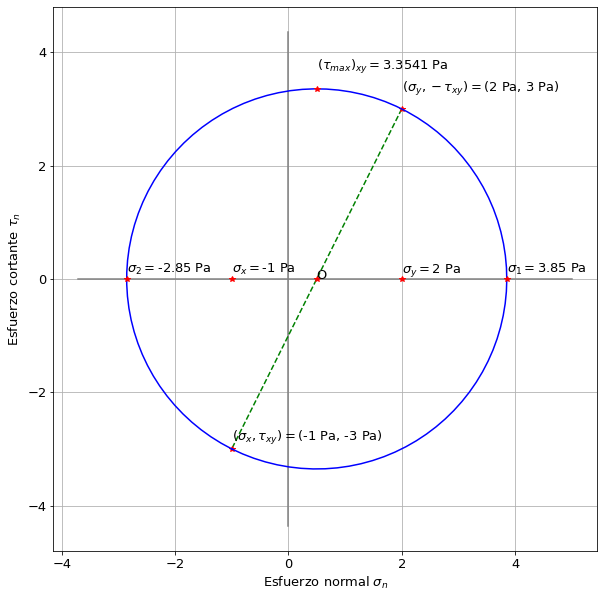

In [16]:
plt.rcParams.update({'font.size': 13})  # Defino un tamaño de fuente para todo el gráfico.

fig, ax = plt.subplots()  # Inicio el lienzo.
fig.set_figwidth(10)
fig.set_figheight(10)

# Dibujo los ejes.
plt.plot((1.3*s2, 1.3*s1), (0, 0), ls="-", color="gray")
#plt.plot((1.3*s2, 1.3*s2), (-1.3*tau_max, 1.3*tau_max), "-k")
plt.plot((0,0), (-1.3*tau_max, 1.3*tau_max), ls="-", color="gray")

# Dibujo la recta que pasa por los puntos C y A.
ax.plot((sy, sx), (-txy, txy), "--g")

ax.plot(sy, -txy, "*r")  # un 1% más abajo del punto.
ax.plot(sx, txy,  "*r")  # un 1% más arriba del punto.

ax.text(sy, -txy*1.1, r"$( \sigma_y, -\tau_{xy} )=$" + f"({sy} Pa, {-txy} Pa)")  
ax.text(sx, txy*0.95,  r"$( \sigma_x, \tau_{xy} )=$" + f"({sx} Pa, {txy} Pa)")  

# Marco el centro de la circunferencia O.
ax.plot((sx+sy)/2, 0, "*r")
ax.text((sx+sy)/2, 0,  "O")

ax.plot(ssn_t, ttn_t, "-b")  # Dibujo la circunferencia.

# Ubico los esfuerzos sx, sy 
ax.plot(sx, 0, "*r")
ax.text(sx, 0.1, r"$\sigma_x = $" + f"{sx} Pa")
ax.plot(sy, 0, "*r")
ax.text(sy, 0.1, r"$\sigma_y = $" + f"{sy} Pa")

# Ubico los esfuerzos principales s1, s2 
ax.plot(s1, 0, "*r")
ax.text(s1, 0.1, r"$\sigma_1 = $" + f"{round(s1, 2)} Pa")
ax.plot(s2, 0, "*r")
ax.text(s2, 0.1, r"$\sigma_2 = $" + f"{round(s2, 2)} Pa")

# Indico el esfuerzo cortante máximo.
ax.plot((sx+sy)/2, tau_max, "*r")
ax.text((sx+sy)/2, 1.1*tau_max, r"$(\tau_{max})_{xy} = $" + f"{round(tau_max, 4)} Pa")

ax.set_xlabel("Esfuerzo normal " + r"$\sigma_n$")  # Nombre del eje x. 
ax.set_ylabel("Esfuerzo cortante " + r"$\tau_n$")  # Nombre del eje y.

# Configuro parámetros del lienzo.
ax.grid(which='major', linestyle='-')
ax.set_aspect('equal', adjustable='box')

plt.show()  # Presento en pantalla el lienzo.